In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import matplotlib.dates as mdates


products_rel_disc=pd.read_csv("./Resources/apple_data.csv")
stocks=pd.read_csv("./Resources/AAPL.csv", parse_dates=['Date'])
date_format1_regex='[a-zA-Z]+\s\d{1,2},\s\d{4}'
products_rel_disc=products_rel_disc[(products_rel_disc['Released'].str.contains(date_format1_regex))]
products_rel_disc

,Released,Model,Family,Discontinued
0,"April 11, 1976",Apple I,Apple I,"September 30, 1977"
1,"June 1, 1977",Apple II,Apple II,"May 1, 1979"
2,"June 1, 1978",Disk II,Drives,"May 1, 1984"
3,"June 1, 1979",Apple II Plus,Apple II series,"December 1, 1982"
4,"June 1, 1979",Apple II EuroPlus,Apple II series,"December 1, 1982"
...,...,...,...,...
666,"September 22, 2023",EarPods (USB-C),Headphones,current
667,"November 1, 2023",Apple Pencil (USB-C),iPad,current
668,"November 7, 2023","iMac (24-inch, M3, 2023)",iMac,current
669,"November 7, 2023","MacBook Pro (M3/M3 Pro/M3 Max) (14-inch, 2023)",MacBook Pro,current


# Format date

In [60]:
products_rel_disc['Released']=pd.to_datetime(products_rel_disc['Released'], format='%B %d, %Y')
products_rel_disc.head()


,Released,Model,Family,Discontinued
0,1976-04-11,Apple I,Apple I,"September 30, 1977"
1,1977-06-01,Apple II,Apple II,"May 1, 1979"
2,1978-06-01,Disk II,Drives,"May 1, 1984"
3,1979-06-01,Apple II Plus,Apple II series,"December 1, 1982"
4,1979-06-01,Apple II EuroPlus,Apple II series,"December 1, 1982"


# Merge data Stocks and Launches

In [61]:
products_rel_disc.columns=products_rel_disc.columns.str.strip()
product_stocks=pd.merge(products_rel_disc,stocks, left_on='Released', right_on='Date', how='left')
product_stocks.dropna(inplace=True)
product_stocks.head()

,Released,Model,Family,Discontinued,Date,Open,High,Low,Close,Adj Close,Volume
15,1981-09-01,Apple ProFile,Drives,"September 1, 1986",1981-09-01,0.095424,0.095982,0.095424,0.095424,0.074481,37027200.0
16,1981-12-01,Apple III Revised[1],Apple III,"December 1, 1983",1981-12-01,0.083147,0.083705,0.083147,0.083147,0.064898,23385600.0
17,1982-10-01,Apple Dot Matrix Printer,Printers,"December 1, 1983",1982-10-01,0.082589,0.083705,0.082589,0.082589,0.064463,46256000.0
18,1982-10-01,Apple Daisy Wheel Printer,Printers,"December 1, 1983",1982-10-01,0.082589,0.083705,0.082589,0.082589,0.064463,46256000.0
20,1983-01-19,Apple Lisa[2],68000,"January 1, 1984",1983-01-19,0.148996,0.151786,0.148438,0.150112,0.117166,169657600.0


# Merge data Stocks and Launches Current 2009-2022

In [62]:
products_rel_disc_2009=product_stocks[(product_stocks['Released']>'2009-01-01')]
products_rel_disc_2009

,Released,Model,Family,Discontinued,Date,Open,High,Low,Close,Adj Close,Volume
343,2009-01-06,"MacBook Pro (Early 2009) (17"")",MacBook Pro,"June 8, 2009",2009-01-06,3.426786,3.470357,3.299643,3.322143,2.840491,1.289310e+09
344,2009-01-29,MacBook (Early 2009) (White),MacBook,"May 27, 2009",2009-01-29,3.324643,3.369286,3.307143,3.321429,2.839881,5.927292e+08
345,2009-03-03,Mac Mini (Early 2009),Mac Mini,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
346,2009-03-03,iMac (Early 2009),iMac,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
347,2009-03-03,Mac Pro (Early 2009),Mac Pro,"August 9, 2010",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
...,...,...,...,...,...,...,...,...,...,...,...
620,2021-11-01,"HomePod Mini (Yellow, Orange, Blue)",Speakers,current,2021-11-01,148.990005,149.699997,147.800003,148.960007,148.335709,7.458830e+07
621,2022-03-18,Apple Studio Display,Displays,current,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.739426,1.235117e+08
622,2022-03-18,iPad Air (5th generation),iPad,current,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.739426,1.235117e+08
623,2022-03-18,iPhone SE (3rd generation),iPhone,current,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.739426,1.235117e+08


# Merge data Stocks and Launches Current

In [63]:
current_products=products_rel_disc_2009[(products_rel_disc_2009["Discontinued"]=="current")]
current_products.head()
current_products.count()

Released        28
Model           28
Family          28
Discontinued    28
Date            28
Open            28
High            28
Low             28
Close           28
Adj Close       28
Volume          28
dtype: int64

# Current products timeline 

<Figure size 1200x600 with 0 Axes>

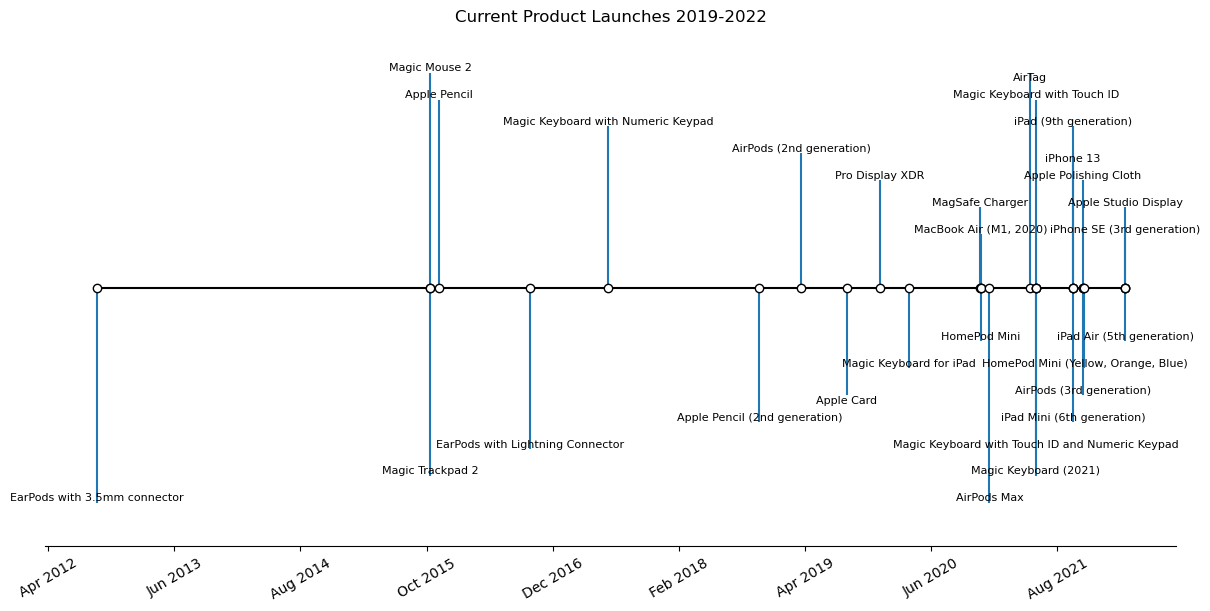

In [64]:

fig=plt.figure(figsize=(12,6))
# Choose some nice levels
levels = np.tile([-8, 8,-7, 7, -6, 6,-5, 5, -4, 4,-3, 3,-2, 2],
                 int(np.ceil(len(current_products["Released"])/14)))[:len(current_products["Released"])]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(12, 6), layout="constrained")
ax.set(title="Current Product Launches 2019-2022")

ax.vlines(current_products["Released"], 0, levels, color="tab:blue")  # The vertical stems.
ax.plot(current_products["Released"], np.zeros_like(current_products["Released"]), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(current_products["Released"], levels, current_products["Model"]):
    ax.annotate(r, xy=(d, l),
                xytext=(0,0), 
                textcoords="offset points",
                horizontalalignment="center",fontsize=8,rotation=0,
                verticalalignment="bottom" if len(r) > 10 else "top")

# format x-axis 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30 )

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

# Current products Vs Closing Price Stocks

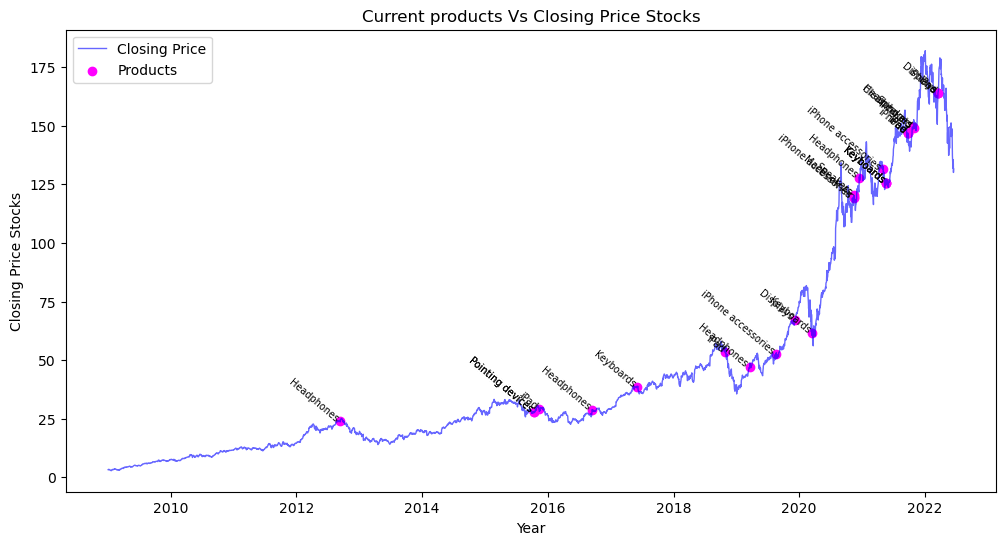

In [65]:
fig=plt.figure(figsize=(12,6))

stocks_2009=stocks[(stocks['Date']>'2009-01-01')]
stocks_graph, = plt.plot(stocks_2009['Date'], stocks_2009['Close'], color="blue",label="Closing Price",alpha=0.6,linewidth=1)
current_stocks_points = plt.scatter(current_products['Released'], current_products['Close'], color="magenta",label="Products")
levels = np.tile([-8, 8,-7, 7, -6, 6,-5, 5, -4, 4,-3, 3,-2, 2],
                 int(np.ceil(len(current_products["Released"])/14)))[:len(current_products["Released"])]
ax.vlines(current_products["Released"], 0, levels, color="tab:blue")  # The vertical stems.
for x,y,z in zip(current_products['Released'], current_products['Close'],current_products['Family']):
        label = z
        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,0), # distance from text to points (x,y)
                     ha='right',rotation=-40, fontsize=7) # horizontal alignment can be left, right or center

plt.title("Current products Vs Closing Price Stocks")
plt.xlabel("Year")
plt.ylabel("Closing Price Stocks")
plt.legend(handles=[stocks_graph,current_stocks_points], loc="best")

plt.show()

# Union Stocks with Current

In [66]:
family_group_2009 = products_rel_disc_2009.groupby(['Released','Family'])
grp_2009_members_count = pd.DataFrame(family_group_2009.size())
grp_2009_members_count.rename(columns={grp_2009_members_count.columns[0]:"Launches"}, inplace=True)
grp_2009_members_count=pd.merge(grp_2009_members_count.reset_index(["Released",'Family']),stocks, left_on='Released', right_on='Date', how='left')
grp_2009_members_count.pop('Date')
grp_2009_members_count.rename(columns={"Released":"Released_date"},inplace=True)

models=[]
discs=[]
isCurrent=[]
for familyrow,released in zip(grp_2009_members_count["Family"], grp_2009_members_count["Released_date"]):
    matchedRow = (products_rel_disc_2009[(products_rel_disc_2009["Family"]==familyrow) & (products_rel_disc_2009["Released"]==released)] )
    models.append( matchedRow["Model"].astype(str).values.flatten().tolist())
    discs.append( matchedRow["Discontinued"].astype(str).values.flatten().tolist())
    isCurrent.append((matchedRow["Discontinued"]=="current").astype(str).values.flatten().tolist())

grp_2009_members_count["Model"]=models
grp_2009_members_count["Discontinued"]=discs
grp_2009_members_count["isCurrent"]=isCurrent
grp_2009_members_count.tail(5)

,Released_date,Family,Launches,Open,High,Low,Close,Adj Close,Volume,Model,Discontinued,isCurrent
179,2021-11-01,Speakers,1,148.990005,149.699997,147.800003,148.960007,148.335709,74588300,"[HomePod Mini (Yellow, Orange, Blue)]",[current],[True]
180,2022-03-18,Displays,1,160.509995,164.479996,159.759995,163.979996,163.739426,123511700,[Apple Studio Display],[current],[True]
181,2022-03-18,Mac Studio,1,160.509995,164.479996,159.759995,163.979996,163.739426,123511700,[Mac Studio],"[June 5, 2023]",[False]
182,2022-03-18,iPad,1,160.509995,164.479996,159.759995,163.979996,163.739426,123511700,[iPad Air (5th generation)],[current],[True]
183,2022-03-18,iPhone,1,160.509995,164.479996,159.759995,163.979996,163.739426,123511700,[iPhone SE (3rd generation)],[current],[True]


# Grouping by family

In [67]:
only_family_group_2009 = products_rel_disc_2009.groupby(['Family']).size()
only_family_group_2009=pd.DataFrame(only_family_group_2009)
only_family_group_2009.rename(columns={only_family_group_2009.columns[0]:"Total_Launches"}, inplace=True)
only_family_group_2009.sort_values(['Total_Launches'],inplace=True)
only_family_group_2009.reset_index(inplace=True)
only_family_group_2009.head()

,Family,Total_Launches
0,AirPort Express,1
1,iPod Classic,1
2,Cleaning aid,1
3,Input Device Accessories,1
4,Xserve,1


# Defining plotting points

In [68]:
grp_2009_members_count_g1=grp_2009_members_count[(grp_2009_members_count['Launches']==1)]
grp_2009_members_count_g2=grp_2009_members_count[(grp_2009_members_count['Launches']==2)]
grp_2009_members_count_g3=grp_2009_members_count[(grp_2009_members_count['Launches']==3)]
grp_2009_members_count_g4=grp_2009_members_count[(grp_2009_members_count['Launches']==4)]
grp_2009_members_count_g5=grp_2009_members_count[(grp_2009_members_count['Launches']==5)]
grp_2009_members_count_g6=grp_2009_members_count[(grp_2009_members_count['Launches']==6)]


# Closing Price Stock Vs Families Launches Graph

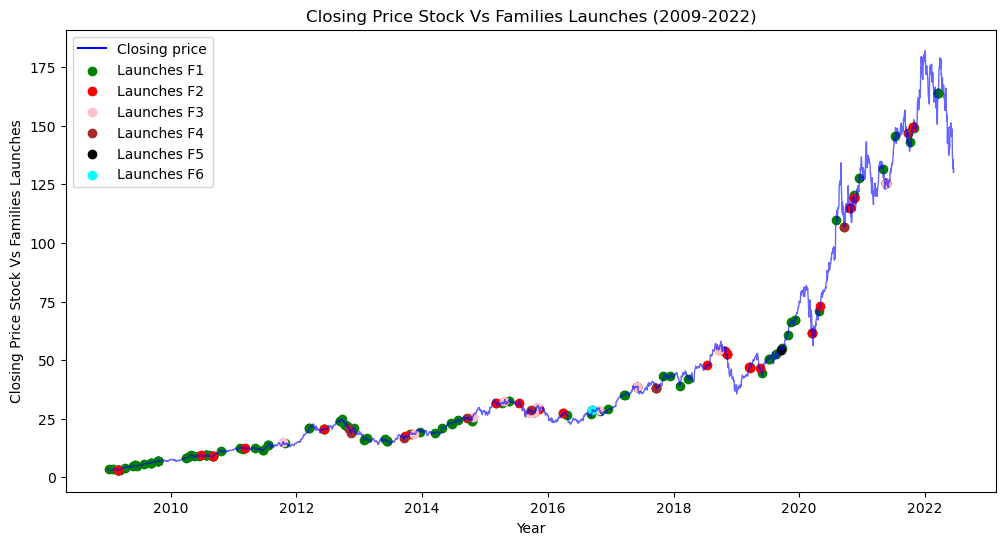

In [69]:
fig=plt.figure(figsize=(12,6))
Launche_f1 = plt.scatter(grp_2009_members_count_g1['Released_date'], grp_2009_members_count_g1['Close'], color="green",label="Launches F1")
Launche_f2 = plt.scatter(grp_2009_members_count_g2['Released_date'], grp_2009_members_count_g2['Close'], color="red",label="Launches F2")
Launche_f3 = plt.scatter(grp_2009_members_count_g3['Released_date'], grp_2009_members_count_g3['Close'], color="pink",label="Launches F3")
Launche_f4 = plt.scatter(grp_2009_members_count_g4['Released_date'], grp_2009_members_count_g4['Close'], color="brown",label="Launches F4")
Launche_f5 = plt.scatter(grp_2009_members_count_g5['Released_date'], grp_2009_members_count_g5['Close'], color="black",label="Launches F5")
Launche_f6 = plt.scatter(grp_2009_members_count_g6['Released_date'], grp_2009_members_count_g6['Close'], color="aqua",label="Launches F6")
stocks_graph, = plt.plot(stocks_2009['Date'], stocks_2009['Close'], color="blue",label="Stocks",alpha=0.6,linewidth=1)
plt.title("Closing Price Stock Vs Families Launches (2009-2022)")
plt.xlabel("Year")
plt.ylabel("Closing Price Stock Vs Families Launches")
plt.legend(handles=[profit_margin, Launche_f1, Launche_f2, Launche_f3, Launche_f4, Launche_f5, Launche_f6], loc="best")
plt.show()

# Overall launches of Families (2009-2022)

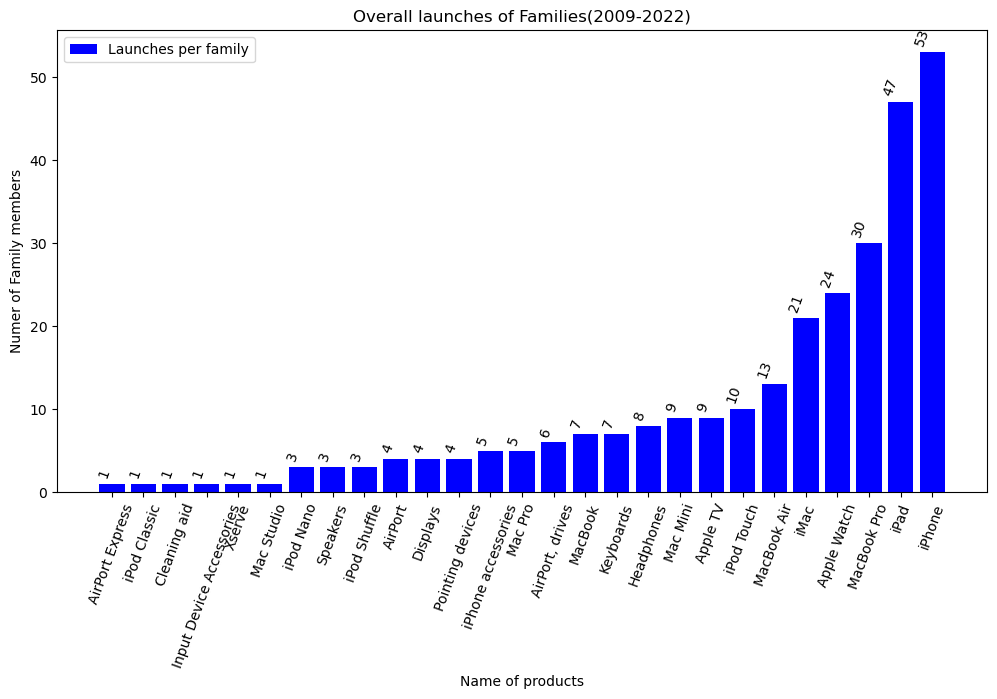

In [70]:
fig=plt.figure(figsize=(12,6))
only_family = plt.bar(only_family_group_2009['Family'], only_family_group_2009['Total_Launches'], color="blue", label="Launches per family")

for x,y in zip(only_family_group_2009['Family'], only_family_group_2009['Total_Launches']):
        label = y
        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,5), # distance from text to points (x,y)
                     ha='right',rotation=70, fontsize=10) # horizontal alignment can be left, right or center


plt.title("Overall launches of Families(2009-2022)")
plt.xlabel("Name of products")
plt.ylabel("Numer of Family members")
plt.legend(handles=[only_family], loc="best")
plt.xticks(rotation=70)
plt.show()

# Launches 2009-2022 Graph

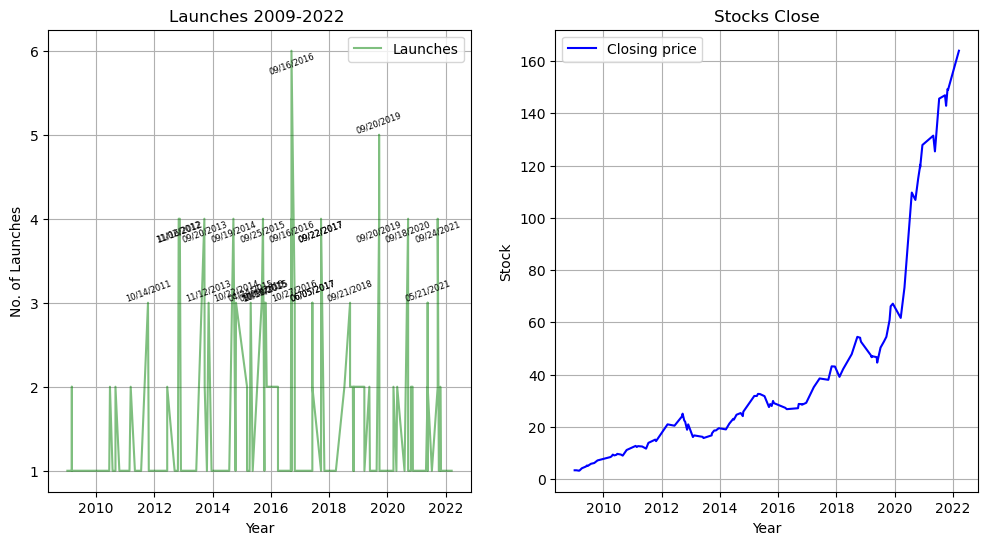

In [71]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1, 2, 1)
appl_stocks,= ax.plot(grp_2009_members_count['Released_date'], grp_2009_members_count['Launches'],color="green",alpha=.5,label="Launches")
plt.title("Launches 2009-2022 ")
plt.xlabel("Year")
plt.ylabel("No. of Launches")
ax.annotate("t",xy=(1,2),xytext=('a',"b"))
plt.legend(handles=[appl_stocks], loc="best")
plt.grid()

for x,y in zip(grp_2009_members_count['Released_date'], grp_2009_members_count['Launches']):
    if y >=3:
        label = x.strftime("%m/%d/%Y")

        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,0), # distance from text to points (x,y)
                     verticalalignment="bottom" if y%2 > 0 else "top",
                     ha='center',rotation=20, fontsize=6) # horizontal alignment can be left, right or center


plt.subplot(1, 2, 2) # row 2, col 2 index 1
profit_margin, = plt.plot(grp_2009_members_count['Released_date'], grp_2009_members_count['Close'], color="blue", label="Closing price")
plt.title("Stocks Close")
plt.xlabel("Year")
plt.ylabel("Stock")
plt.legend(handles=[profit_margin], loc="best")
plt.grid()
plt.show()

In [72]:
grp_2009_members_count[(grp_2009_members_count["Released_date"]=='2019-09-20')]["Model"].astype(str).values.flatten().tolist()

["['Apple Watch Series 5', 'Apple Watch Hermès Series 5', 'Apple Watch Nike Series 5', 'Apple Watch Edition Series 5']",
 "['iPhone 8 (128 GB)', 'iPhone 8 Plus (128 GB)', 'iPhone 11', 'iPhone 11 Pro', 'iPhone 11 Pro Max']"]

In [73]:
grp_2009_members_count[(grp_2009_members_count["Released_date"]=='2016-09-16')]["Model"].astype(str).values.flatten().tolist()

["['Apple Watch Series 1', 'Apple Watch Series 2', 'Apple Watch Hermès Series 2', 'Apple Watch Edition Series 2']",
 "['EarPods with Lightning Connector']",
 "['iPhone 7 (32 & 128 GB)', 'iPhone 7 (256 GB)', 'iPhone 7 Plus (32 & 128 GB)', 'iPhone 7 Plus (256 GB)', 'iPhone 6S (32 GB)', 'iPhone 6S Plus (32 GB)']"]